In [1]:
#Problem statement
#Develop a sentiment analysis model to classify restarunt reviews as positve or negative

In [2]:
#Description
# with the rapid growth of online platforms for sharing opinions and reviews,restarunts often rely 
#on the customer feedback to imporve their services and attract   a new customers.
# Analyzing the sentiment of these reviews can provide valuable insights into customer satisfaction.

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Reviews.csv')

In [5]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
data.head() # Top 5 rows of the data set

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
data.tail() # Last 5 rows of the data set

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
data.info() # information of the dat set like , data type , memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
data.describe() # stastical information of the data set

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
#checking the null values of the data set
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [12]:
#checking the value counts
value_counts = data['Liked'].value_counts()
print(value_counts)

1    500
0    500
Name: Liked, dtype: int64


In [13]:
pip install matplotlib

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

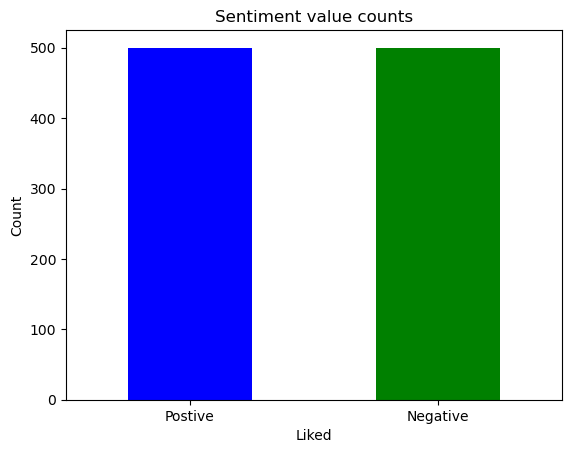

In [15]:
value_counts.plot(kind = 'bar' , color = ['blue', 'green'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1] , labels=['Postive','Negative'],rotation=0)
plt.show()

In [16]:
from wordcloud import WordCloud

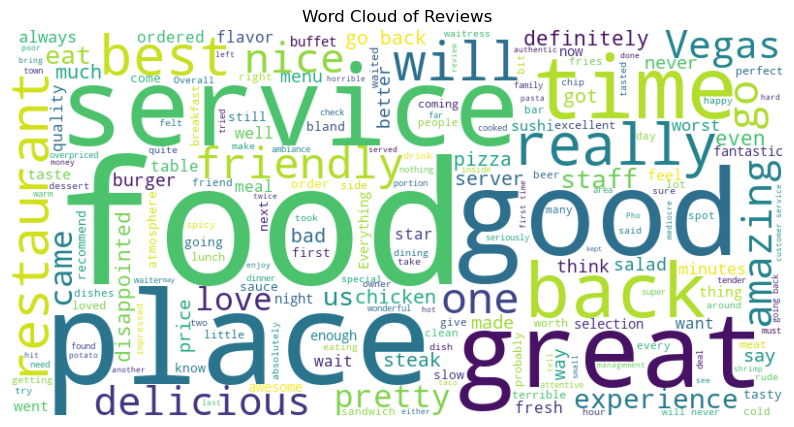

In [17]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800 , height = 400 ,background_color = 'white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [18]:
from collections import Counter

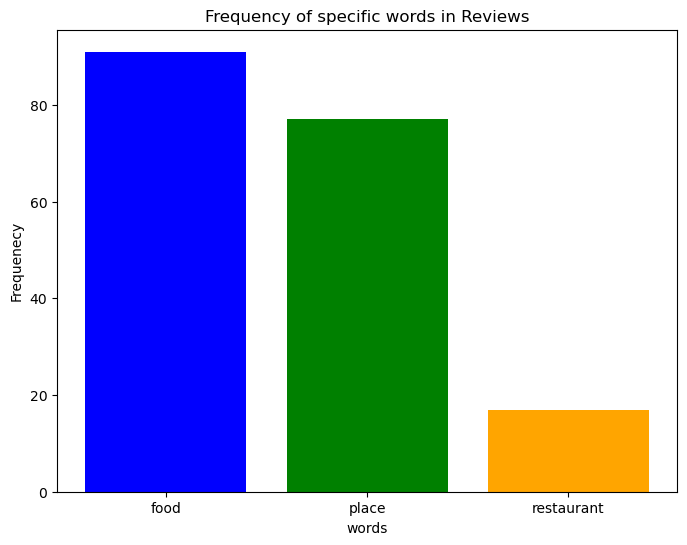

In [19]:
target_words = ['food','place','restaurant']
all_words = " ".join(data['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values() , color = ['blue','green','orange'])
plt.xlabel('words')
plt.ylabel('Frequenecy')
plt.title('Frequency of specific words in Reviews')
plt.show()

In [20]:
#Text preprocessing

In [21]:
#convert a data set into lower case
lowercased_text = data['Review'].str.lower()

In [22]:
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [23]:
#tokinization
from nltk.tokenize import word_tokenize

In [24]:
data['Tokens'] = data['Review'].apply(word_tokenize)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\RGUKT/nltk_data'
    - 'C:\\Users\\RGUKT\\anaconda3\\nltk_data'
    - 'C:\\Users\\RGUKT\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\RGUKT\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\RGUKT\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
print(data['Tokens'])

In [ ]:
data.info()

In [ ]:
data['Review'].value_counts()

In [ ]:
import string


In [ ]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [ ]:
print(data['Review'])

In [ ]:
data['Review'].value_counts()

In [ ]:
#Removing the stop words like this, is , are ,was 
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [ ]:
print(data['Tokens'])

In [ ]:
#stemming
#stemming is the process of reducing the a word into root or base word form by removig suffix 
#example : driving stemmed is drive

In [ ]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
stemmer = PorterStemmer()

In [ ]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [ ]:
print(data['stemmed'])

In [ ]:
#Lemmatization
#Lemmatization is the process transforming a word into its base or dictionary form
#example is better is lemmtized to good 

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
data['Lemmatized'] = data['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))

In [ ]:
print(data['Lemmatized'])

In [ ]:
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))

In [ ]:
print(data['No_Numbers'])

In [ ]:
#removing special characters like @ # %,*
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))

In [ ]:
print(data['cleaned'])

In [ ]:
#expanding method
# don't eat food in this hotel , when we apply expanted text it will convert into do not eat food in this hotel

In [ ]:
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)


In [ ]:
print(data['Expanded'])

In [ ]:
#Removing emojis
!pip install emoji

In [ ]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [ ]:
print(data['emoji'])

In [ ]:
# removing liks from review_ text
# food is good vist www.abchotel.in

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [ ]:
print(data['cleaned'])